<a href="https://colab.research.google.com/github/rafaelgrecco/DS-ML-Projects/blob/master/Detec%C3%A7%C3%A3o_de_Pneumonia_com_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#*Detecção de Pneumonia usando Deep Learning*

##*Deep Learning na área da saúde*

Com o avanço do campo da **Inteligência** **Artificial** cada vez mais ela é aplicada nos mais diversos campos do conhecimento e com a área da saúde não é diferente.

<p align="center"><img src="https://raw.githubusercontent.com/rafaelgrecco/Imagens-datasets/master/ML.jpg" height="300px"></p>

Atualmente a Inteligência Artificial está sendo aplicada em diversas situações na área da saúde, algumas delas são:

* Aumentar a precisão de diagnósticos
* Alerta do quadro clínico do paciente
* Tratamento de Doenças
* Determinar estudos relevantes sobre um determinado tema
* Identificação e assimilação de sintomas 


###*Deep Learning*
A técnica conhecida como **Deep Learning** é amplamente aplicada na área da saúde, ela é baseada nas **Redes Neurais Artificias** que tem como objetivo reproduzir o comportamento do cérebro humano para assimilar as informações.

O comportamento das **Redes Neurais Artificiais** baseia-se no comportamento de um neurônio, elas possuem camadas dispostas de forma hierárquica, assim a informação vai de camada em camada, conduzindo a informação, até a camada de `output`. A imagem a seguir ilustra esse processo.

<p align="center"><img src="https://raw.githubusercontent.com/rafaelgrecco/Imagens-datasets/master/RNNNOVO.png" height="300px"></p>

##*Pneumonia: O que é?*

A *Pneumonia* é **caracterizada** por uma condição inflamatória no pulmão que afeta principalmente os Alvéolos. Os principais fatores que podem levar a um quadro de pneumonia são:

* inalação de produtos tóxicos
* infecções virais ou bacterianas

Podem ser classficados como **fatores** **de** **risco**, ou seja fatores que podem aumentar as chances de desenvolver a doença, o tabagismo, o uso de ar-condicionado, também pode ser incluído pessoas com asma, doença Pulmonar Obstrutiva Crônica (DPOC), diabetes, fibrose cística entre outras.

Qualquer pessoa está sujeita a desenvolver a doença, no entanto ela possui **maior** **incidência** em idosos e em também em crianças abaixo dos 5 anos de idade, vale destacar que segundo a OMS, a Pneumonia é uma das principais causas de mortes em crianças abaixo dos 5 anos. [Fonte](https://www.who.int/news-room/fact-sheets/detail/children-reducing-mortality#:~:text=Leading%20causes%20of%20death%20in,safe%20water%20and%20food%20and)

Os sintomas podem variar conforme o causador, mas geralmente é comum apresentar **febre alta** *(acima dos 37,5°C)*, **dor no peito**, **tosse com secreção** e **falta de ar**.

O **Diagnóstico** é feito com base em exames clínicos como: 
* *Radiografia do Tórax*
* *Hemograma*
* *Hemocultura*

Vale destacar que a *Radiográfia do Tórax* além de ajudar no diagnóstico, também contribui tanto para a avaliação da gravidade da doença, como a resposta do paciente ao tratamento.

O **Tratamento** pode variar de acordo com o agente causador. Em **Pneumonias** **bacterianas** geralmente o tratamento é feito com o uso de antibióticos, já em **Pneumonias** **virais** o tratamento é feito com medicamentos para alívio dos sintomas e também pode ser usado medicamentos antivirais.

<p align="center"><img src="https://raw.githubusercontent.com/rafaelgrecco/Imagens/master/pneumonia.png" height="300px"></p>

#*Obtenção dos dados*
O dataset que vamos trabalhar é composto por três pastas, *(train, test e valid)* e as três estão subdividas em *NORMAL* e *PNEUMONIA*, ao total são 5863 imagens no formato *JPEG*.

O dataset originalmente foi publicado no site *Mendeley Data* [Link](https://data.mendeley.com/datasets/rscbjbr9sj/2) e repostado no Kaggle [Link](https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia), no entanto para facilitar coloquei [Aqui](https://drive.google.com/file/d/1jOgztRukLrc-kzMkkTa6T2fK4jTIsBnj/view) um link direto para fazer o download.

##*Importando bibliotecas necessárias e fazendo as configurações iniciais*

Nesta primeira etapa, vamos importar todas as bibliotecas que vamos utilizar durante o desenvolvimento.

Ainda nesta etapa, também vamos adicionar uma pequena configuração para melhorar a visualização de imagens e gráficos no projeto. 

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout, BatchNormalization, MaxPooling2D
from keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
import random
import zipfile
from google.colab import drive

# melhorar a visualização
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
mpl.style.use( 'ggplot' )
plt.style.use('fivethirtyeight')
sns.set(context="notebook", palette="dark", style = 'whitegrid' , color_codes=True)

Após fazer o download do dataset de imagens, você vai notar que o mesmo estará compactado, depois de adiciona-lo no drive, vamos conectar o colab ao Google drive e em seguida descompactar o dataset. 

In [ ]:
# conectar o colab ao drive
drive.mount('/content/drive')

# extraindo dataset

path = '/content/drive/MyDrive/Notebooks/Datasets/Pneumonia.zip'
zip = zipfile.ZipFile(file=path, mode='r')
zip.extractall('./')
zip.close

Mounted at /content/drive


<bound method ZipFile.close of <zipfile.ZipFile filename='/content/drive/MyDrive/Notebooks/Datasets/Pneumonia.zip' mode='r'>>

##*Organizando os diretórios*

Após importar e descompactar os arquivos, você vai ter 3 pastas como mencionado, com as imagens de Treino, Teste e Validação, mas agora temos que organizar nossos diretórios em `dataset_train`, `dataset_test`, `dataset_valid` e também adicionar os labels das imagens.

In [ ]:
# especificando o caminho de cada dataset
dir_train = '/content/chest_xray/train' 
dir_valid = '/content/chest_xray/val'
dir_test = '/content/chest_xray/test'

labels = ['NORMAL', 'PNEUMONIA'] # criando os labels

dataset_train = []
dataset_valid = []
dataset_test = []
 
def load_train_dataset(): # criando função para carregar dataset_train
  for label in labels:
    path = os.path.join(dir_train, label)
    class_num = labels.index(label)
    for imagem in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path, imagem), cv2.IMREAD_GRAYSCALE)
        resize_img = cv2.resize(img_array, (150,150))
        dataset_train.append([resize_img, class_num])
      except Exception as e:
        pass

def load_valid_dataset(): # função para carregar dataset_valid
  for label in labels:
    path = os.path.join(dir_valid, label)
    class_num = labels.index(label)
    for imagem in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path, imagem), cv2.IMREAD_GRAYSCALE)
        resize_img = cv2.resize(img_array, (150,150))
        dataset_valid.append([resize_img, class_num])
      except Exception as e:
        pass

def load_test_dataset(): # função para carregar dataset_test
  for label in labels:
    path = os.path.join(dir_test, label)
    class_num = labels.index(label)
    for imagem in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path, imagem), cv2.IMREAD_GRAYSCALE)
        resize_img = cv2.resize(img_array, (150,150))
        dataset_test.append([resize_img, class_num])
      except Exception as e:
        pass

load_train_dataset()
load_valid_dataset()
load_test_dataset()

Você pode observar que nas dimensões da imagem na função `cv2.imread()` colocamos 150 x 150 *pixels*, o motivo disso é que vamos configurar nossa rede neural para receber imagens com essas dimensões.

##*Separando o dataset*

É de conhecimento de todos que temos que separar o dataset em `X` e `Y`, em nosso `X` vamos carregar as imagens e no `Y` vamos carregar os labels das respectivas imagens.

**Atenção**: Deve-se fazer isso para os 3 datasets, *treino*, *teste* e *validação*.

In [ ]:
x_train_ini = []
y_train = []

x_valid_ini = []
y_valid = []

x_test_ini = []
y_test = []

for features, label in dataset_train:
  x_train_ini.append(features)
  y_train.append(label)

for features, label in dataset_valid:
  x_valid_ini.append(features)
  y_valid.append(label)

for features, label in dataset_test:
  x_test_ini.append(features)
  y_test.append(label)

##*Exploração dos Dados e Pré-processamento das imagens*
Agora que separamos nossos dados em `X` e `Y` podemos iniciar a etapa de exploração de dados e Pré-processamento das imagens, dentro delas, vamoss ter sub-etapas que serão explicadas uma a uma.

###*Verificando se o Dataset está balanceado*

Quando estamos lidando com Deep Learning, sempre devemos estar atentos se os datasets estão balanceados.

Por mais que seja nítido, que o número de pessoas sem Pneumonia seja menor que o número de pessoas sem a doença, trabalhar com os dados dessa forma, pode impactar negativamente de forma significativa no desempenho do nosso modelo.

Portanto, vamos visualizar como nosso `dataset_train` que será usado para treinar a *rede neural* está distribuído.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


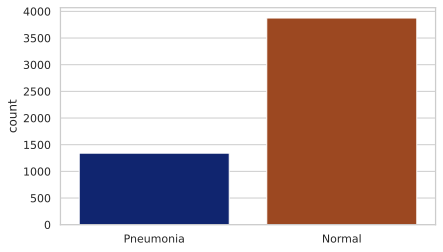

In [ ]:
graph_label = []

for i in dataset_train:
  if (i[1] == 1):
    graph_label.append('Normal')
  else:
    graph_label.append('Pneumonia')
sns.countplot(graph_label)

Como podemos notar, o dataset não esta balanceado, logo vamos ter que realizar o processo de **data augmentation** que será explicado mais a frente.

###*Visualizando exemplos de imagem*

Vamos visualizar uma imagem de um pulmão saudável e a imagem de um pulmão com pneumonia.

Text(0.5, 0, 'PNEUMONIA')

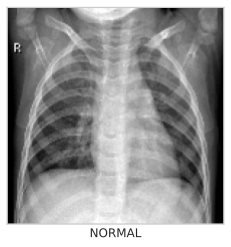

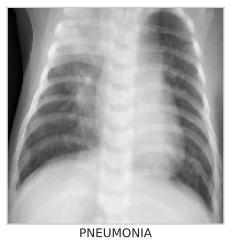

In [ ]:
# pulmão saudável
plt.figure(figsize=(4,4))
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.imshow(dataset_train[0][0], cmap='gray')
plt.xlabel(labels[dataset_train[0][1]])

# pulmão com pneumonia
plt.figure(figsize=(4,4))
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.imshow(dataset_train[-1][0], cmap='gray')
plt.xlabel(labels[dataset_train[-1][1]])

###*Normalizando os Pixels*

Nesta etapa vamos fazer os valores de cada *pixel*, que como já foi mencionado está no intervalo $[0,255]$, ficarem no intervalo $[0,1]$, essencialmente queremos transformar os valores dos *pixels* para o tipo `float`. Para fazer isso basta dividir todos os *pixels* pelo maior valor possível, nesse caso $255.0$

In [ ]:
# função para normalizar os pixels
f_norm = lambda x: (np.array(x) / 255.0).astype('float32')

x_train = f_norm(x_train_ini)
x_valid = f_norm(x_valid_ini)
x_test = f_norm(x_test_ini) 

# shape:
print('Shape x_train: {} \nShape x_valid: {} \nShape x_test: {}'.format(
    x_train.shape, x_valid.shape, x_test.shape))

Shape x_train: (5216, 150, 150) 
Shape x_valid: (16, 150, 150) 
Shape x_test: (624, 150, 150)


###*Redimensionalizar as Imagens*

O **TensorFlow** espera uma lista com 4 dimensões e com base na saída que tivemos, pode-se notar que os datasets de treino, validação e teste estão nos retornando uma lista com 3 dimensões. A lista que o TensorFlow espera é da forma $(m, a, l, c)$, onde 
* $m=$ *Número de imagens* 
* $a=$ *Altura*
* $l=$ *Largura*
* $c=$ *Número de Canais*

Como as imagens estão em **escala cinza**, o número de canais é $1$

In [ ]:
# função resize:
f_resize = lambda x: np.array(x).reshape(-1, 150, 150, 1)

x_train = f_resize(x_train)
x_valid = f_resize(x_valid)
x_test = f_resize(x_test)

# vamos printar o shape novamente para verificar as mudanças
print('Shape x_train: {} \nShape x_valid: {} \nShape x_test: {}'.format(
    x_train.shape, x_valid.shape, x_test.shape))

Shape x_train: (5216, 150, 150, 1) 
Shape x_valid: (16, 150, 150, 1) 
Shape x_test: (624, 150, 150, 1)


Agora temos uma lista com as 4 dimensões esperadas




###*Converter `X` e `Y` para array*
Esta etapa é necessária para posteriormente treinarmos nosso dataset.

In [ ]:
# convertendo para array
fc = lambda x: np.array(x)

x_train = fc(x_train)
y_train = fc(y_train)
x_valid = fc(x_valid)
y_valid = fc(y_valid)
x_test = fc(x_test)
y_test = fc(y_test)

##*Data Augmentation*

Está etapa é necessária uma vez que como já foi explicado, nosso dataset tem uma grande discrepância entre as imagens com pneumonia e sem a doença.

Este processo faz com que tenhamos mais dados, a partir dos já existentes, para isso ele aplica transformações de **translação, rotação e inversões** com essas pequenas alterações nas imagens já existentes, nossa rede neural as considera como novas imagens.

In [ ]:
data_gen = ImageDataGenerator(
    rotation_range = 50,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    zoom_range = 0.2,
    horizontal_flip = True
)

Agora vamos treinar nosso `data_gen` com as imagens de treino.



In [ ]:
data_gen.fit(x_test)

##*Criando o modelo*

In [ ]:
model = keras.models.Sequential()
model.add(Conv2D(32, (3,3), strides = 1, padding='same', activation='relu', input_shape=(150,150,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides=2, padding='same'))
model.add(Conv2D(64, (3,3), strides=1 ,padding='same', activation='relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())

model.add(MaxPool2D((2,2), strides=2, padding='same'))
model.add(Conv2D(64, (3,3), strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides=2, padding='same'))
model.add(Conv2D(128, (3,3), strides=1, padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(MaxPool2D((2,2), strides=2, padding='same'))
model.add(Conv2D(256, (3,3), strides=1, padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(MaxPool2D((2,2), strides=2, padding='same'))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1, activation='sigmoid'))

###*Compilando a Rede Neural*

Geralmente como `optimizer` aplicamos o `adam`, no entanto, para nosso conuunto de dados o `rmsprop` se mostrou mais eficiente. 

In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      320       
_________________________________________________________________
batch_normalization (BatchNo (None, 150, 150, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 75, 75, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 38, 38, 64)        0

###*Aplicando `ReduceLROnPlateau`*
Algumas vezes, a aprendizagem do modelo estagna, quando usamos essa função, ela monitora uam quantidade, no caso, pedimos para ela monitorar a acurácia do nosso modelo e no momento em que esse valor se estagnar por mais de 2 épocas (`patience=2`) ela penaliza o modelo reduzindo sua taxa de aprendizagem, evitando o *Plateau* do modelo.

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

###*Treinando o modelo*

In [ ]:
history = model.fit(data_gen.flow(
x_train, y_train, batch_size=32, shuffle=True),
epochs=10, validation_data = (x_valid, y_valid), callbacks=[learning_rate_reduction])

Epoch 1/10
163/163 [==============================] - 19s 66ms/step - loss: 1.2313 - accuracy: 0.7845 - val_loss: 12.9915 - val_accuracy: 0.5000
Epoch 2/10
163/163 [==============================] - 10s 63ms/step - loss: 0.3342 - accuracy: 0.8756 - val_loss: 43.6707 - val_accuracy: 0.5000
Epoch 3/10
163/163 [==============================] - 10s 63ms/step - loss: 0.2450 - accuracy: 0.9060 - val_loss: 22.5082 - val_accuracy: 0.5000

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Epoch 4/10
163/163 [==============================] - 10s 63ms/step - loss: 0.1859 - accuracy: 0.9397 - val_loss: 6.1320 - val_accuracy: 0.5000
Epoch 5/10
163/163 [==============================] - 10s 63ms/step - loss: 0.1542 - accuracy: 0.9457 - val_loss: 0.7604 - val_accuracy: 0.6250
Epoch 6/10
163/163 [==============================] - 10s 64ms/step - loss: 0.1580 - accuracy: 0.9499 - val_loss: 0.6978 - val_accuracy: 0.6875
Epoch 7/10
163/163 [==============================] 

###*Avaliando o modelo*
Plotando o histótico da evolução do nosso modelo durante as épocas.

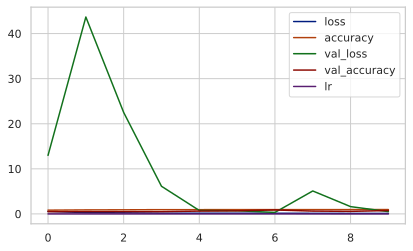

In [ ]:
pd.DataFrame(history.history).plot()
plt.show()

###*Verificando a Acurácia do modelo*
Na primeira célula vamos pedir para o modelo fazer a previsão dos valores do `x_test`

Já na segunda pedimos para retornar a acurácia de acertos com imagens de pulmão saudável e pulmão com pneumonia, notamos que nosso modelo conseguiu 93% de acurácia para detectar pneumonia e 89% de acurácia para detectar imagens com o pulmão saudável.

In [ ]:
predicts = model.predict_classes(x_test)
predicts = predicts.reshape(1,-1)[0] # colocar em uma linha
predicts[:20]

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [ ]:
print(classification_report(y_test, predicts,
target_names = ['Pneumonia', 'Normal']))

              precision    recall  f1-score   support

   Pneumonia       0.81      0.89      0.85       234
      Normal       0.93      0.87      0.90       390

    accuracy                           0.88       624
   macro avg       0.87      0.88      0.87       624
weighted avg       0.88      0.88      0.88       624



##*Testando com uma única imagem*
Podemos testar nosso modelo com uma única imagem também, basta pegar qualquer imagem do diretório test e fazer os testes com imagens em que há a presença da doença e imagens onde não há.

**Atenção**: Para fazer isso observe que temos que aplicar todas as transformações do Pré-processamento de imagens. 

In [ ]:
# para analisar uma única imagem:

# retornar valores próximos de 1 -> Pneumonia
# retornar valores próximos de 0 -> Normal

img = '/content/chest_xray/test/PNEUMONIA/person108_bacteria_506.jpeg'
img_array = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
resize_img = cv2.resize(img_array, (150,150))

resize_img = np.array(resize_img) / 255.0
resize_img = f_resize(resize_img)

print(model.predict(resize_img))

[[0.97960037]]


No exemplo acima, em `img` importamos uma imagem da pasta PNEUMONIA, o valor que nos retornou foi próximo de 1, sinalizando que o pulmão da imagem tem *Pneumonia*.